In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.gmm import IV2SLS
import random
import pandas as pd

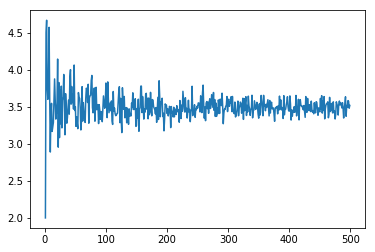

In [7]:
rolls = []
for i in range(500):
    rolls.append(np.mean(np.random.randint(1,7, size = i)))
    
plt.plot(rolls)


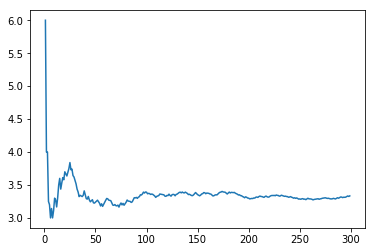

In [9]:
dicerolls = []
means = []

for i in range(300):
    dicerolls.append(random.randint(1,6))
    means.append(np.mean(dicerolls[0:i]))

plt.plot(means)

In [9]:
df = pd.read_csv('data/CARD.csv')
df = df[df.fatheduc.notnull()]
df = df[df.motheduc.notnull()]
df['exper2'] = df['exper']**2

In [10]:
model = smf.ols('lwage ~ educ + exper + exper2 + fatheduc + motheduc + black + smsa + south', data = df, missing = 'drop')
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 19 Sep 2018   Prob (F-statistic):          9.71e-143
Time:                        22:57:57   Log-Likelihood:                -981.75
No. Observations:                2220   AIC:                             1982.
Df Residuals:                    2211   BIC:                             2033.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6253      0.080     57.488      0.0

In [11]:
first_stage = smf.ols('educ ~ nearc4 + exper + exper2 + fatheduc + motheduc + black + smsa + south', data = df, missing = 'drop')
result_first_stage = first_stage.fit()
df['D_hat']= result_first_stage.predict()
print result_first_stage.summary()

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     257.9
Date:                Wed, 19 Sep 2018   Prob (F-statistic):          8.47e-310
Time:                        22:57:57   Log-Likelihood:                -4528.6
No. Observations:                2220   AIC:                             9075.
Df Residuals:                    2211   BIC:                             9126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7970      0.270     51.155      0.0

In [12]:
second_stage = smf.ols('lwage ~ D_hat + exper + exper2 + fatheduc + motheduc + black + smsa + south', data = df, missing = 'drop')
result_second_stage = second_stage.fit()
print result_second_stage.summary()

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     56.69
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           2.99e-84
Time:                        22:57:57   Log-Likelihood:                -1118.3
No. Observations:                2220   AIC:                             2255.
Df Residuals:                    2211   BIC:                             2306.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1460      1.315      3.153      0.0